In [1]:
%load_ext autoreload
%autoreload 2

## Overview

Examine how performance changes as we vary different hyperparameters:
* Learning Rate (Meta) - originally set to 1e-2: 1e-1, 1e-2, 1e-3, 1e-4
* Learning Rate (Prediction Models) - originally set to 1e-3: 1e-1, 1e-2, 1e-3, 1e-4, 1e-5
* Number of outer steps - orginally set to 100, didn't stop early
    * Could run for longer (although performance curves look like it's converged): Run for 200 and examine curves
* Number of inner epochs - originally set to 20: looks like it stopped early (before 20 epochs) consistently
* Stopping criteria for outerloop - orginally if mean component-wise difference between consecutive Ws is less than 1e-5
    * Could also go back to performance based early stopping
    * Or a combination of the two
* Stopping criteria for inner loop - if perf is not better than best perf so far 3 consecutive times
* User batch size: Did all three users, but could see what happens when I go to 2
* Prediction model batch size - originally 32
* Optimizers: Currently using Adam for meta learning and SGD for inner loop training
    
    
What to start with
* Learning rates
* Inner loop optimizer

In [1]:
import json
import os

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme()

In [6]:
data_dir = "/data/ddmg/redditlanguagemodeling/results/mnist/user_weight_train_2_debug/"

In [3]:
lrs = [1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
meta_lrs = [1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5]

In [11]:
results = []
for lr in lrs:
    for meta_lr in meta_lrs:
        with open(os.path.join(data_dir, "predLR_{}_metaLR_{}".format(lr, meta_lr), "42", "test_results.json"), 'rb') as f:
            test_results = json.load(f)
        user0_acc = test_results["1"]["test_accuracy"]
        user1_acc = test_results["2"]["test_accuracy"]
        user2_acc = test_results["3"]["test_accuracy"]
        results.append({"lr": lr, "meta_lr": meta_lr, "user0_acc": user0_acc, "user1_acc": user1_acc, "user2_acc": user2_acc})

In [12]:
df = pd.DataFrame(results)

In [16]:
df["mean_acc"] = df.apply(lambda x: x[["user0_acc", "user1_acc", "user2_acc"]].mean(), axis=1)

In [17]:
df

,lr,meta_lr,user0_acc,user1_acc,user2_acc,mean_acc
0,1.00000,1.00000,0.38,0.43,0.58,0.463333
1,1.00000,0.10000,0.35,0.43,0.57,0.450000
2,1.00000,0.01000,0.38,0.43,0.58,0.463333
3,1.00000,0.00100,0.38,0.43,0.58,0.463333
4,1.00000,0.00010,0.38,0.43,0.58,0.463333
5,1.00000,0.00001,0.38,0.43,0.58,0.463333
6,0.10000,1.00000,0.99,0.43,0.56,0.660000
7,0.10000,0.10000,0.38,0.43,0.56,0.456667
8,0.10000,0.01000,0.38,0.42,0.58,0.460000
9,0.10000,0.00100,0.38,0.43,0.58,0.463333


<AxesSubplot:xlabel='meta_lr', ylabel='lr'>

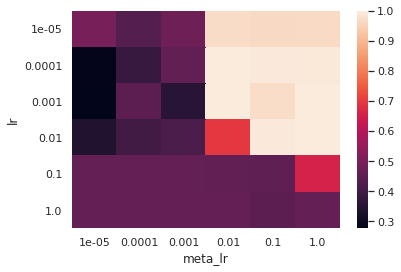

In [19]:
# takeaway -- is senstive to parameter settings
# mat learning rate needs to be large and prediction learning rate needs to be small
sns.heatmap(df.pivot("lr", "meta_lr", "mean_acc"))